<center><h1>Applying Computer Vision to geospatial imagery</h1></center>
<h2>Bienvenu Sedin Massamba <br><em>M.Sc GIS & Remote Sensing</em></h2>
<h3></h3>
<img src="https://github.com/Massamba-Bienvenu/LSU-Advanced-Remote-Sensing-Presentation/blob/master/roi.png?raw=true" alt="2018 IEEE GRSS Data Fusion Challenge">

</br> <strong>Data Source</strong>
<p>The DFC2018 hyperspectral data (cf. Fig. 2) was acquired over Central Houston, Texas, USA, using an airborne sensor. It covers a [380–1,050] nm spectral range over 48 contiguous bands at 1 m GSD. 20 classes of interest are defined and include not only urban categories (buildings and roads of various types, railways, cars, trains, etc.) but also various vegetation types (stressed, healthy, deciduous or evergreen trees) and specific materials. This dataset is part of the 2018 Data Fusion Contest release, along with very-high-resolution imagery and multispectral LiDAR.</p>

<br>
<a href="http://hyperspectral.ee.uh.edu/?page_id=1075" target="_blank" rel="Huston 2018 hyperspectral data">Original dataset can be downloaded here</a>

<a href="http://hyperspectral.ee.uh.edu/?page_id=1075" target="_blank" rel="Huston 2018 hyperspectral data">Clean dataset can be downloaded here</a>

<h3><strong>Different tasks that you can complete using deep learning:</strong></h3>
<strong></strong><a href="https://www.sciencedirect.com/science/article/pii/S0924271619301108" target="_blank" rel="">Paper</a>

<ul>
    <li>Pixel classification (Sementic segmentation)</li>
    <li>Image classification</li>
    <li>Object detection</li>
    <li>Instance segmentation</li>
    <li>Image fusion</li>
    <li>Image registration</li>
</ul>
<br>

<img src="https://github.com/Massamba-Bienvenu/LSU-Advanced-Remote-Sensing-Presentation/blob/master/computer%20vision%20cases.PNG?raw=true" alt="Computer vision cases">

<strong>Souce: </strong><a href="https://www.esri.com/content/dam/esrisites/en-us/about/events/media/UC-2019/technical-workshops/tw-5748-894.pdf" target="_blank" rel="">Esri</a>

<h3><strong>Deep learning frameworks by order of popularity:</strong></h3>
<ul>
<li>Tensorflow</li>
<li><strong>Keras</strong></li>
<li>PyTorch</li>
<li>Caffe</li>
<li>Theano</li>
<li>MXNET</li>
<li>CNTK</li>
<li>DeepLearning4</li>
<li>Chainer</li>
<li>FastAI</li>
</ul>

<strong>Processor Type:</strong>

<ul>
<li><strong>gpu</strong></li>
<li><strong>cpu</strong></li>
</ul>


<p><strong>GPU</strong>(Graphics Processing Unit) is considered as heart of Deep Learning, a part of Artificial Intelligence. It is a single chip processor used for extensive Graphical and Mathematical computations</p>

<strong>Free GPU:</strong>
<em>Google Collab</em>

<p><strong>How to run jupyter notebook on Google Colab GPU:</strong>
<ol>
    <li>
    <p> Step 1: Create a new directory in your Google Drive, rename and keep its name.<br> copy all the dataset and notebook in the directory, including the notebook <br>Right-click on the notebook and sect: "Open with collaboratory"</p></li>
    <li>Step 2: Go to edit--->settings---select GPU then save</li>
    <li>Step 3: Mount Colab on your drive: <br> copy and paste the following code in the first cell:<br>
        <strong>from google.colab import drive<br>
        drive.mount('/content/drive')</strong><br></li>
    <li>Step 4: Run the cell, open the link, give access and copy the provided code back to the empty field in your notebook</li>
    <li> Step 5: Specify your envoronment directory by copying and pasting the below code: <br>
        <li> <Step 6:> Remove all ### and write the name of your directory you created in step 1 then run the code</li>
        <strong>import os <br>
        os.chdir("/content/drive/My Drive/  #######") <br>
        !ls<br></strong><br>
        </li>
    
</ol>


<hr>

#### Install important packages

In [1]:
!pip install spectral
!pip install rasterio
!pip install sklearn
!pip install keras
!pip install tensorflow

Processing /home/jovyan/.cache/pip/wheels/ad/cf/f3/3cab28f6aed46f15c8db09c6ad678483610426261025e61ff8/spectral-0.20-cp37-none-any.whl
  Using cached rasterio-1.1.3-cp37-cp37m-manylinux1_x86_64.whl (18.1 MB)
  Using cached affine-2.3.0-py2.py3-none-any.whl (15 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached cligj-0.5.0-py3-none-any.whl (5.7 kB)
Processing /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-manylinux1_x86_64.whl (7.1 MB)
ERROR: tsfresh 0.13.0 requires patsy>=0.4.1, which is not installed.
ERROR: tsfresh 0.13.0 requires statsmodels>=0.8.0, which is not installed.
  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached Keras_Preprocessing-1.1.0-py2.py3-none-any.whl (41 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using ca

In [2]:
import rasterio                        #for reading raster data
from spectral import*                  #for working hyperspectral data
import numpy as np                     #for making calculation easy
import matplotlib.pyplot as plt        #for visualizing the results

In [3]:
# Read the imagery as an array
img =  rasterio.open('huston_hs.img').read()

# Read the labels as an array
gt = rasterio.open('huston_gt.img').read()
# Convert labels to 2D data
gt = gt.reshape(gt.shape[1],gt.shape[2])

# Print the shape of the imgery and the shape of the labels
print('The shape of the image is:{}'.format(img.shape))
print('The shape of the labels is:{}'.format(gt.shape))

The shape of the image is:(50, 601, 2384)
The shape of the labels is:(601, 2384)


<p>Our data cube is <strong>601 by 2384</strong> with <strong>50 bands</strong>,while the target has is <strong>601 by 2384</strong>. However the correct dataset should only have 48 bands. An inspection of the the two last bands show that these are dead and need to be removed. </p>

#### Remove bad bands (48 and 49)

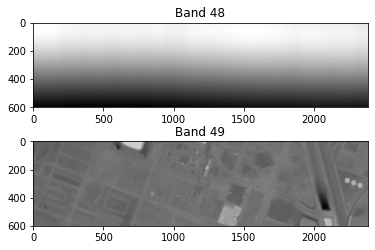

The new shape of the imagery is: (48, 601, 2384)


In [4]:
# Display bad band 48
plt.subplot(2, 1, 1)
plt.imshow(img[48,:,:],cmap ='gist_yarg')
plt.title('Band 48')

# Display bad band 49
plt.subplot(2, 1, 2)
plt.imshow(img[49,:,:], cmap ='gist_yarg',)
plt.title('Band 49')

plt.show()


# Let's remove these two bad bands
img  = img[0:48]
print("The new shape of the imagery is: {}".format(img.shape))

#### A quick look at one band(48th)

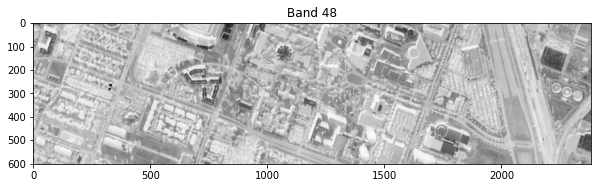

In [5]:
# A quick look at one band
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(img[47,:,:], cmap='gist_yarg')
plt.title('Band 48')
plt.show()

#### Let's create an RGB color image of the imagery

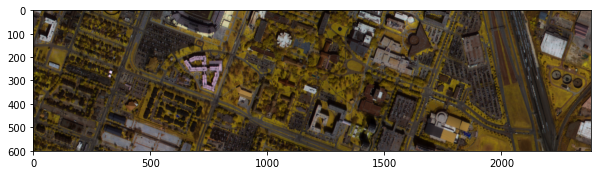

In [6]:
# Read the band values into numpy arrays
red   = img[47]  # extract band 47
green = img[31]  # extract band 31
blue  = img[15]  # extract band 15

# Function to normalize the grid values between 0-1
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(rgb)
#ax.axis('off')
plt.show()

#### Let's visualize the labels
Firt we need to create colormap with 20 colors representing each class

In [7]:
# Import the necessary packages
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [8]:
# We create a list of colors
color_array = np.array([[0,0,0],
                        [166,206,227],
                        [31,120,180],
                        [178,223,138],
                        [51,160,44],
                        [251,154,153],
                        [227,26,28],
                        [253,191,111],
                        [255,127,0],
                        [202,178,214],
                        [106,61,154],
                        [255,255,153],
                        [216,191,216],
                        [0,255,0],
                        [0,255,255],
                        [45,138,86],
                        [255,0,255],
                        [159,31,239],
                        [255,0,0],
                        [255,255,0],
                        [255,255,255]])

# To be able to create our own colomap the color values must be between 0-1
norm_colr= color_array*1.0/255

# Let's create our our colormap
cm = LinearSegmentedColormap.from_list(name='my_cmap', colors=norm_colr)

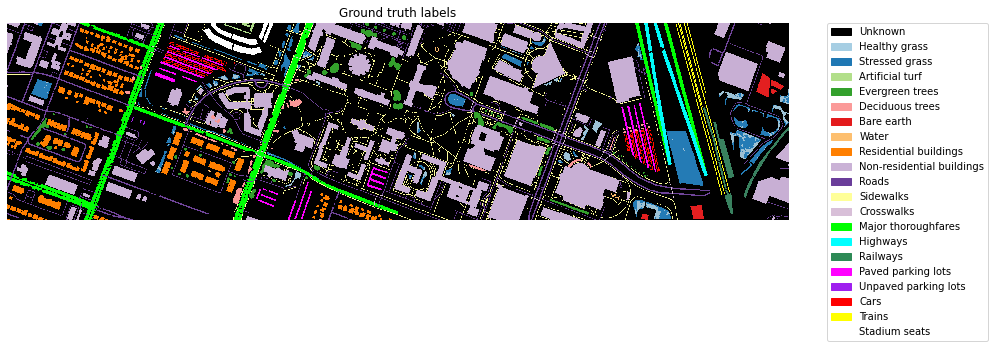

In [9]:
# adding the label image
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot()
ax.imshow(gt,interpolation='none',cmap=cm)
ax.set_title('Ground truth labels')
ax.axis('off')

# Defining a list of class names
labels = ['Unknown','Healthy grass','Stressed grass','Artificial turf','Evergreen trees','Deciduous trees','Bare earth','Water','Residential buildings','Non-residential buildings','Roads','Sidewalks','Crosswalks','Major thoroughfares','Highways',
          'Railways','Paved parking lots','Unpaved parking lots','Cars','Trains','Stadium seats']

# Get 1D array of each unique class value(label code) 
class_vals = np.unique(gt.ravel())
color_vals = [norm_colr [value] for value in class_vals]
patches = [mpatches.Patch(color=color_vals[i], label=labels[i]) for i in range(len(class_vals))]

# Adding the legend
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<hr>

<center><h3> CNN HYPERSPTECTRAL LAND COVER CLASSIFICATION<h3></center>

<h3><strong>Typical Deep Learning Workflow<strong></h3>
<ol>
    <li>Data Collection</li>
    <li>Data Preparation (Preprocessing)</li>
    <li>Choose a Model</li>
    <li>Train & Test the Model</li>
    <li>Evaluate the Model</li>
    <li>Parameter Tuning</li>
    <li>Make Predictions</li>
</ol>

<h3><strong>1. Data Preparation (Preprocessing)</strong></h3>
<ul>
    <li>Feature Extraction</li>
    <li>Train-Test Split</li>
    <li>Feature Scaling</li>
    <li>Feature grouping</li>
</ul>

<center><h3>DATA PREPARATION(PREPROCESSING)<h3></center>

<strong>Features Extraction through dimensionality reduction using Principal Component Analysis (PCA)</strong>

In [10]:
#!pip install sklearn
#import PCA function from sklearn
from sklearn.decomposition import PCA

In [11]:
# This function takes in the data in shape(width, height, channels) and outputs new data and pca
def applyPCA(X, numComponents=8):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [12]:
# First, we test test the above function with 8 components by creating X to see how many principal components we need
X,pca = applyPCA(img.T, numComponents=8) # we transposet the img to get the expected shape in the function

Text(0, 0.5, 'cumulative explained variance')

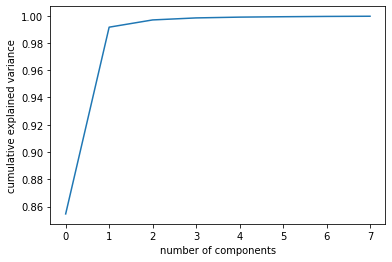

In [13]:
# Plot the the total variance explained by different number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Let's visualize these 8 components

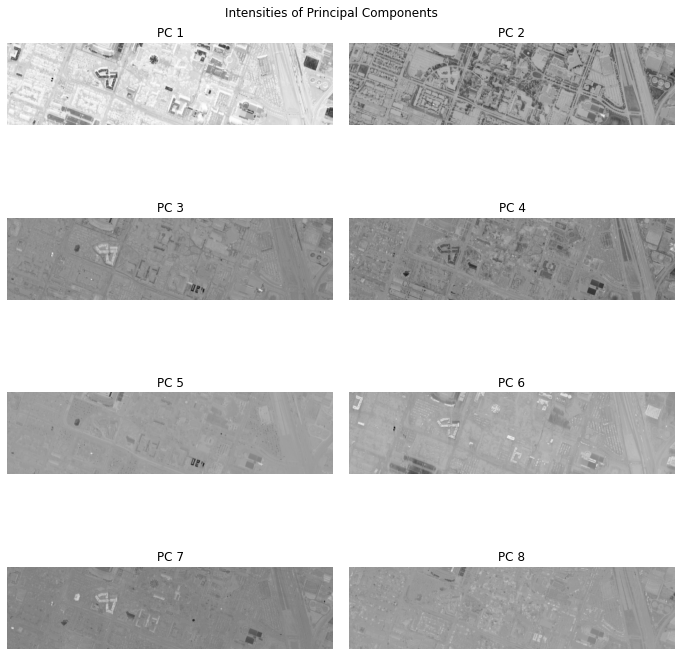

In [14]:
fig,axes = plt.subplots(4,2,figsize=(10,10),sharex='all',sharey='all')
fig.suptitle('Intensities of Principal Components ',fontsize=12)
axes = axes.ravel()
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
for i in range(8):
    axes[i].imshow(X.T[i,:,:],cmap='gist_yarg')
    axes[i].set_title('PC '+str(i+1),fontsize=12)
    axes[i].axis('off')

It can be observed that 3 to 4 components explain almost 98% of the variance observed in the data.Therefore, we'll reduce the 48 bands to 4 principal components. Hence, let's get the first 4 pca.

In [15]:
# Let's extract only the 4 components
X = X[:,:,0:4]

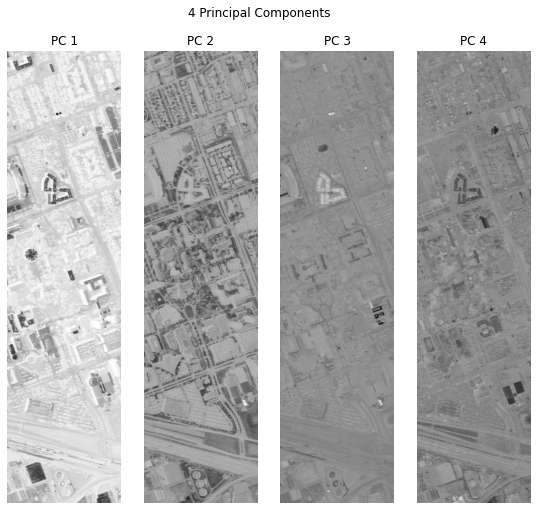

In [16]:
fig,axes = plt.subplots(1,4,figsize=(8,8),sharex='all',sharey='all')
fig.suptitle('4 Principal Components ',fontsize=12)
axes = axes.ravel()
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
for i in range(4):
    axes[i].imshow(X[:,:,i],cmap='gist_yarg')
    axes[i].set_title('PC '+str(i+1),fontsize=12)
    axes[i].axis('off')

<center><h3>Padding with Zero and Paches creation</h3></center>

<img src="https://github.com/Massamba-Bienvenu/LSU-Advanced-Remote-Sensing-Presentation/blob/master/padding.png?raw=true" alt="exemple of padded image" height="620" width="620" align="center">

In [17]:
# This function will padd the imager with 2 lignes or zero on each side
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

In [18]:
# This function will create patches. We can turn on/off the removeZeroLabels for the unkow areas in the data.here it's off
def createImageCubes(X, y, windowSize=7, removeZeroLabels = False):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]   
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels

In [19]:
# Let's create the patches by applying the function
patches = createImageCubes(X, gt.T,windowSize=11, removeZeroLabels = False)
data_patches = patches[0]
patch_labels = patches[1]

# print the new shape of the data and target after patches extraction
print("The new shape of the data is: {}".format(data_patches.shape))
print("The new shape of the labels is: {}".format(patch_labels.shape))

The new shape of the data is: (1432784, 11, 11, 4)
The new shape of the labels is: (1432784,)


There are in total 504856 patches of 11 by 11 size and 4 bands that represents the 4 pca.
There are also 504856 individual labels for each patch

#### Let's plot a sample of 20 patches

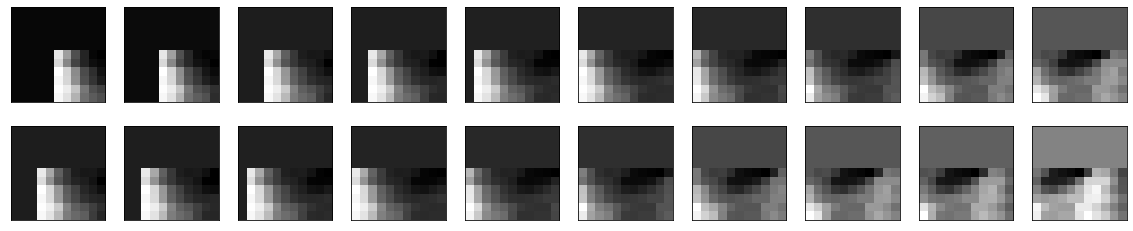

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many patches we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_patches[i,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(data_patches[i+2,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<center><h3>Splitting the data into training and test set</h3></center>

In [21]:
# Import the splitting functionfrom sklearn
from sklearn.model_selection import train_test_split

In [22]:
data_patches = data_patches.astype('float32')
data_patches.dtype

dtype('float32')

In [23]:
# Splitting the data into train and test sets
# 90% of the data will be used for training and 10% for testing.(Note: This is arbitrary)
X_train, X_test, y_train, y_test = train_test_split(data_patches, patch_labels, test_size=0.1)

#Convert X_train and X_test to ('float32')
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

# Print the shape of the training set and test set
print("The training set has a shape zise of {} and it's corresponding labels set has a shape of {}".format(X_train.shape,y_train.shape))
print("The Test set has a shape zise of {} and it's corresponding labels set has a shape of {}".format(X_test.shape, y_test.shape))

The training set has a shape zise of (1289505, 11, 11, 4) and it's corresponding labels set has a shape of (1289505,)
The Test set has a shape zise of (143279, 11, 11, 4) and it's corresponding labels set has a shape of (143279,)


<center><h3> Feature Scaling Methods:</h3></center>
<p>Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.</p>

<p><strong>Normalization</strong></p>
    <p>Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.</p>
    new_x = (x - min) / (max - min).
    <p>You can normalize your dataset using the scikit-learn object MinMaxScaler.</p>

<p><strong>Standardizing</strong></p>
<p>Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.</p>

In [24]:
# Import from skleanr MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
#Feature scaling train data
X_train_shape = X_train.shape
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_train = X_train.reshape(X_train_shape)
print('Xtrain has min of {}, a max of {} and a shape of {}'.format(X_train.min(), X_train.max(), X_train.shape))

#Feature scaling train data
X_test_shape = X_test.shape
X_test = scaler.fit_transform(X_test.reshape(-1, 1))
X_test = X_test.reshape(X_test_shape)
print('X_test has min of {}, a max of {} and a shape of {}'.format(X_test.min(), X_test.max(), X_test.shape))

#Feature data_patches data
data_patches_shape = data_patches.shape
data_patches = scaler.transform(data_patches.reshape(-1, 1))
data_patches = data_patches.reshape(data_patches_shape)
print('data_patches has min of {}, a max of {} and a shape of {}'.format(data_patches.min(), data_patches.max(),data_patches.shape))

Xtrain has min of 0.0, a max of 1.0 and a shape of (1289505, 11, 11, 4)
X_test has min of 0.0, a max of 1.0 and a shape of (143279, 11, 11, 4)
data_patches has min of 0.0, a max of 1.0 and a shape of (1432784, 11, 11, 4)


<h3>Computing class weights</h3>
Since our class labels are unbalanced, we ought to assign some weigts to classes so that the model will not biased towards classes with too many labels.

In [26]:
# import from sklearn a function that can compute and assign a weigh to each class
from sklearn.utils import compute_class_weight

In [27]:
#clas = gt.reshape((-1)) # reshaping th gt to the right fomat
classWeight = compute_class_weight('balanced',classes=np.unique(patch_labels),y=patch_labels) 
classWeight = dict(enumerate(classWeight))
classWeight

{0: 0.07352705115462571,
 1: 6.962731862823709,
 2: 2.0991880353150427,
 3: 99.74825953773322,
 4: 5.018595772255206,
 5: 13.58849024572984,
 6: 15.108018052216458,
 7: 256.4955245255997,
 8: 1.715473436684339,
 9: 0.30492603205249347,
 10: 1.4875465382594846,
 11: 2.0049901414619744,
 12: 44.94585607629086,
 13: 1.4720766704886838,
 14: 6.916148963386672,
 15: 9.835348064553774,
 16: 5.932853002070393,
 17: 467.31376386170905,
 18: 10.42123255289591,
 19: 12.707731332428668,
 20: 9.998213587897059}

<center><h3> CHOOSE AND BUILD THE MODEL<h3></center>
<h3><strong>Remote Sensing Deep Learning Landscape</strong></h3>
<h4><strong>Supervised Models</strong></h4>
<ul>
    <li>Artificial Neural Networks</li>
    <li>Convolutional neural networks</li>
    <ul>
        <li>
            1DCNN, 2DCNN,3DCNN
        </li>
    </ul>
    <li>Recurrent neural networks(GRU & LSTM)</li>
        <ul>
        <li>
            LSTM, GRU
        </li>
    </ul>
</ul>
<h4><strong>Unsupervised Models</strong></h4>
<ul>
    <li>Self-Organizing Maps</li>
    <li>Generative adversarial networks</li>
    <li>Restricted Boltzmann machines</li>
    <li>Autoencoders</li>
    <li>Deep belief networks</li>
</ul>

<p>For this project, are going to build a simple 2D CNN for land cover classification.</p>

In [86]:
# We first import the necessary packages
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,Add
from keras.layers import Conv2D, MaxPooling2D,LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam,Nadam,Adadelta,Adamax
from keras.callbacks import EarlyStopping

In [89]:
model = Sequential() # Instantiate the model
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(11,11,4))) # add a cnn layer
model.add(MaxPooling2D((2, 2),padding='same')) # add a maxpool layer

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same')) # add a cnn layer
model.add(MaxPooling2D((2, 2),padding='same')) # add a maxpool layer

model.add(Flatten()) # flatten everything

model.add(Dense(512, activation='relu'))   # add a dense layer(multilayer perceptron)
model.add(Dense(21, activation='softmax')) # set ouput function with 20 classes possible

# compile the model
model.compile(loss= 'sparse_categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

#print the model summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 11, 11, 64)        2368      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               295424    
_________________________________________________________________
dense_48 (Dense)             (None, 21)              

<center><h3>TRAIN & TEST THE MODEL<h3></center>

In [90]:
CNN_MODEL = model.fit(X_train, y_train, 
                      batch_size=64,
                      epochs=30,
                      verbose=1,
                      validation_data=(X_test, y_test))

Train on 1289505 samples, validate on 143279 samples
Epoch 1/30
1289505/1289505 [==============================] - 186s 144us/step - loss: 0.6303 - accuracy: 0.7842 - val_loss: 0.5318 - val_accuracy: 0.8117
Epoch 2/30
1289505/1289505 [==============================] - 186s 144us/step - loss: 0.4141 - accuracy: 0.8474 - val_loss: 0.4001 - val_accuracy: 0.8522
Epoch 3/30
1289505/1289505 [==============================] - 186s 144us/step - loss: 0.3630 - accuracy: 0.8651 - val_loss: 0.3610 - val_accuracy: 0.8673
Epoch 4/30
1289505/1289505 [==============================] - 186s 144us/step - loss: 0.3328 - accuracy: 0.8759 - val_loss: 0.3420 - val_accuracy: 0.8735
Epoch 5/30
1289505/1289505 [==============================] - 185s 144us/step - loss: 0.3143 - accuracy: 0.8828 - val_loss: 0.3134 - val_accuracy: 0.8846
Epoch 6/30
1289505/1289505 [==============================] - 186s 144us/step - loss: 0.3010 - accuracy: 0.8873 - val_loss: 0.2942 - val_accuracy: 0.8912
Epoch 7/30
1289505/1289

    
<h3> Typical metrics used</h3>
<ul>
    <li>Overall accuracy on both train and test sets</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 Score</li>
    <li>Cohen’s Kappa</li>
    <li>ROC AUC</li>
    <li>Confusion Matrix.</li>
</ul>

#### Calculate Model Metrics

In [91]:
# evaluate the model
train_acc = model.evaluate(X_train, y_train, verbose=0) # This return the model's loss and accuracy on the train set as a list
test_acc = model.evaluate(X_test, y_test, verbose=0)    # This return the model's loss and accuracy on the test set as a list

In [92]:
# Print the model's overall accuracy and loss on both train and test sets
print('Model Train Acc: %.3f, Model Test Acc: %.3f' % (train_acc[1], test_acc[1]))
print('Model Train Loss: %.3f, Model Test Loss: %.3f' % (train_acc[0], test_acc[0]))

Model Train Acc: 0.914, Model Test Acc: 0.903
Model Train Loss: 0.237, Model Test Loss: 0.281


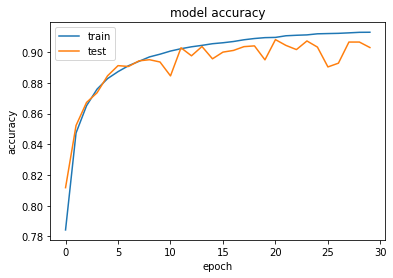

In [93]:
# summarize history for accuracy
plt.plot(CNN_MODEL.history['accuracy'])
plt.plot(CNN_MODEL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

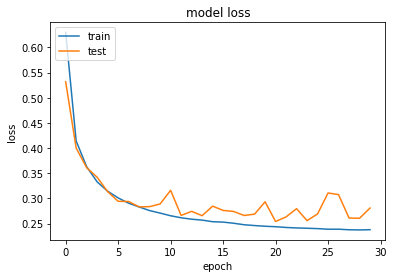

In [94]:
# summarize history for loss
plt.plot(CNN_MODEL.history['loss'])
plt.plot(CNN_MODEL.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
from sklearn.metrics import classification_report
from operator import truediv

In [96]:
y_pred_test = model.predict(data_patches)
y_pred_test = np.argmax(y_pred_test, axis=1)

classification = classification_report(y_true=patch_labels,
                                       y_pred=y_pred_test, target_names=labels)
print(classification)

                           precision    recall  f1-score   support

                  Unknown       0.92      0.96      0.94    927928
            Healthy grass       0.78      0.66      0.72      9799
           Stressed grass       0.88      0.84      0.86     32502
          Artificial turf       0.88      0.46      0.60       684
          Evergreen trees       0.79      0.68      0.73     13595
          Deciduous trees       0.87      0.65      0.75      5021
               Bare earth       0.95      0.90      0.92      4516
                    Water       0.89      0.71      0.79       266
    Residential buildings       0.94      0.79      0.86     39772
Non-residential buildings       0.95      0.97      0.96    223752
                    Roads       0.80      0.59      0.68     45866
                Sidewalks       0.72      0.47      0.57     34029
               Crosswalks       0.64      0.29      0.40      1518
      Major thoroughfares       0.83      0.92      0.87     

#### Plot the confusion matrix

In [97]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [98]:
#!pip install seaborn

In [99]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

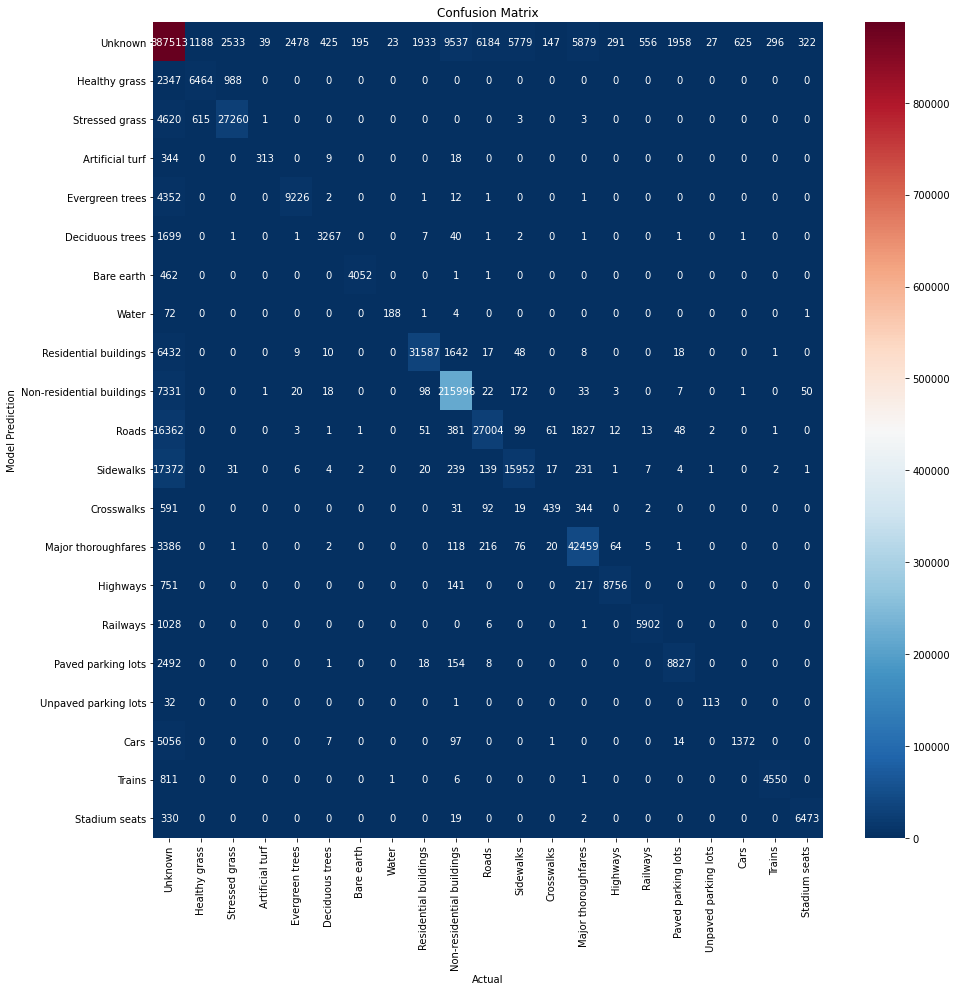

In [100]:
mat = confusion_matrix(patch_labels,y_pred_test)

fig, axes = plt.subplots(figsize=(15,15))  
axes = sns.heatmap(mat, annot=True,fmt='d',
                   cbar=True, cmap='RdBu_r')

tick_marks = np.arange(len(labels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(labels,rotation=90)
axes.set_yticks(tick_marks)
axes.set_yticklabels(labels,rotation=0)
axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')
axes.set_title('Confusion Matrix')

<center><h3>MAKE PREDICTIONS<h3></center>

In [101]:
y_pred_test = y_pred_test.reshape(img.shape[2],img.shape[1])

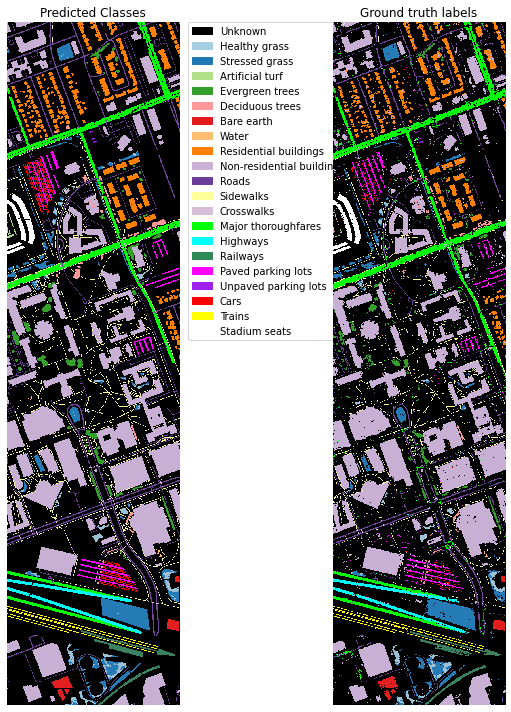

In [102]:
# adding the label image
fig = plt.figure(figsize=(10,10))

#Plot the classified map and the ground truth labels
ax0 = fig.add_subplot(1,2,1)
ax0.imshow(gt.T,interpolation='none',cmap=cm)
ax0.set_title('Predicted Classes')
ax0.axis('off')

# Create space between the two images
plt.tight_layout()

# adding the label image
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(y_pred_test,interpolation='none',cmap=cm)
ax1.set_title('Ground truth labels')
ax1.axis('off')

# Defining a list of class names
labels = ['Unknown','Healthy grass','Stressed grass','Artificial turf','Evergreen trees','Deciduous trees','Bare earth','Water','Residential buildings','Non-residential buildings','Roads','Sidewalks','Crosswalks','Major thoroughfares','Highways',
          'Railways','Paved parking lots','Unpaved parking lots','Cars','Trains','Stadium seats']

# Get 1D array of each unique class value(label code) 
class_vals = np.unique(gt.ravel())
color_vals = [norm_colr [value] for value in class_vals]
patches = [mpatches.Patch(color=color_vals[i], label=labels[i]) for i in range(len(class_vals))]

# Adding the legend
ax0.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)